# Linearna regresija

Regresijska analiza je jedna od najvažnijih i najkorištenijih modela danas u statistici. Jedan od najosnovnijih tipova regresijske analize je linearna regresija - metoda statističke analize podataka koja se bavi traženjem ovisnosti između dvije ili više varijabli.

Često se koristi se za određivanje "modela predikcije" za podatke koji na prvu izgledaju nasumično, te ukazuje na neke pravilnosti u njima.

Postoje dva tipa linearne regresije, jednostavna linearna regresija (ovisnost jedne varijable ($y$) o jednoj nezavisnoj varijabli ($x$)) i multivarijantna regresija (ovisnost o više varijabli).

**Nezavisna varijabla** je varijabla čiju vrijednost određuje osoba koja provodi pokus.

**Zavisna varijabla** je varijabla čije vrijednosti ovise o vrijednosti neovisne varijable.

## Jednostavna linearna regresija

Jednostavna linearna regresija je linearni regresijski model sa jednom neovisnom varijablom dan formulom:

$$ y(x) = \alpha_0 + \alpha_1x $$

Metoda traži linearnu funkciju koja na najbolji mogući način opisuje ovisnost varijabli.

### Primjer - Ovisnost temperature mora o slanosti mora

Na skupu od preko 800000 mjerenja temperature i slanosti mora na određenim dubinama slijedi primjena metode jednostavne linearne regresije. Opisat ću ovisnost zavisne varijable _temperatura_ o nezavisnoj varijabli _slanost._ Podaci su preuzeti sa sljedećeg linka: https://www.kaggle.com/sohier/calcofi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import zipfile
with zipfile.ZipFile("bottle.zip", "r") as zip_ref:
    zip_ref.extractall("targetdir")
df = pd.read_csv('targetdir/bottle.csv', low_memory=False)
df = df.loc[:,['Depthm', 'T_degC', 'Salnty']]
df.dropna(inplace = True)
df.rename(columns = {df.columns[0]: 'Dubina'}, inplace = True)
df.rename(columns = {df.columns[1]: 'Temperatura'}, inplace = True)
df.rename(columns = {df.columns[2]: 'Slanost'}, inplace = True)
df

,Dubina,Temperatura,Slanost
0,0,10.500,33.4400
1,8,10.460,33.4400
2,10,10.460,33.4370
3,19,10.450,33.4200
4,20,10.450,33.4210
...,...,...,...
864858,0,18.744,33.4083
864859,2,18.744,33.4083
864860,5,18.692,33.4150
864861,10,18.161,33.4062


In [3]:
df.describe()

,Dubina,Temperatura,Slanost
count,814247.000000,814247.000000,814247.000000
mean,221.936839,10.860287,33.841337
std,308.657488,4.224930,0.461636
min,0.000000,1.440000,28.431000
25%,46.000000,7.750000,33.489000
50%,125.000000,10.110000,33.866000
75%,300.000000,13.930000,34.197000
max,5351.000000,31.140000,37.034000


### Metoda najmanjih kvadrata

Za rješavanje ovakvih vrsta problema koristi se metoda najmanjih kvadrata.

Od nekog pravca $ y(x) = \alpha_0 + \alpha_1x $ točka ($x_i , y_i$) odstupa za $\epsilon_i$ pa možemo pisati: $ y(x) = \alpha_0 + \alpha_1x + \epsilon_i$.

Princip: Od svih pravaca regresije najvjerojatniji je onaj za koji je suma kvadrata odstupanja minimalna.

$$ S(\alpha_0 , \alpha_1)  =  \sum\limits_{i = 1}^{n} {\epsilon_i}^2  =  \sum\limits_{i = 1}^{n} (y_i - (\alpha_1x_i + \alpha_0))^2  =  min $$ 

$$  \frac{\partial S(\alpha_0 , \alpha_1)}{\partial \alpha_0}
   = 0  ,  \frac{\partial S(\alpha_0 , \alpha_1)}{\partial \alpha_1}
   = 0 $$
   
Rješavanjem ove dvije jednadžbe dobivamo rješenja za $ \alpha_0 $ i $\alpha_1.$

$$\alpha_1 = \frac{\sum\limits_{i = 1}^{n} {(x_i - \bar{x})(y_i - \bar{y})}} {\sum\limits_{i = 1}^{n} {({x_i - \bar{x}})^2}} $$

$$ \alpha_0 = \bar{y} - \alpha_1\bar{x} $$

In [4]:
def najmanjiKvadrati(X, Y):
    xmean = np.mean(X)
    ymean = np.mean(Y)
    alpha1 = sum((X - xmean) * (Y - ymean)) / sum((X - xmean)**2)
    alpha0 = ymean - xmean * alpha1
    return alpha0, alpha1

In [5]:
## 800000 je ipak malo previše pa ćemo smanjiti na otprilike 340000
df = df.loc[(df['Dubina'] > 0) & (df['Dubina'] <= 100)]
slanost = df['Slanost']
temperatura = df['Temperatura']
# promatramo temperaturu i slanost na 20m odnosno 50m dubine
slanostXX = df.loc[df['Dubina'] == 20]['Slanost']
temperaturaXX = df.loc[df['Dubina'] == 20]['Temperatura']
slanostL = df.loc[df['Dubina'] == 50]['Slanost']                                    
temperaturaL = df.loc[df['Dubina'] == 50]['Temperatura']
df.count()

Dubina         340807
Temperatura    340807
Slanost        340807
dtype: int64

In [6]:
def plotaj(ax, i, slanost, temperatura, dubina, color1, color2):
    ax[i].scatter(slanost, temperatura, c = color1)
    ax[i].set(title = dubina)
    alpha, beta = najmanjiKvadrati(slanost, temperatura)
    ax[i].plot(slanost, beta * slanost + alpha, '-', color = color2)
    return alpha, beta

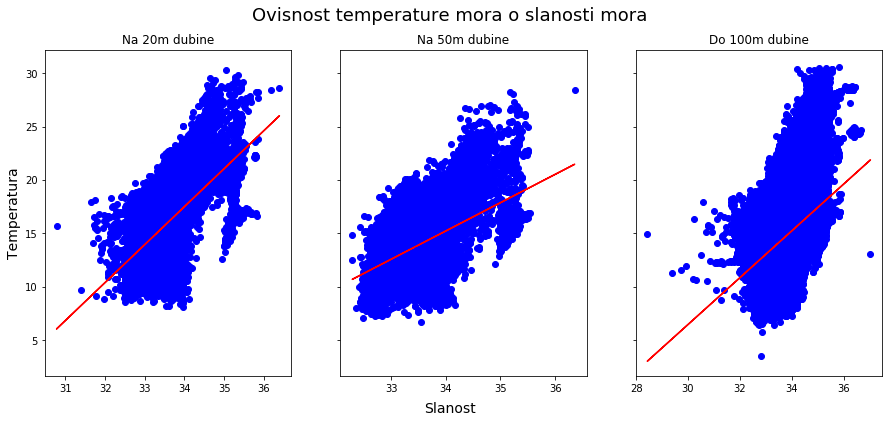

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey = True)
fig.suptitle("Ovisnost temperature mora o slanosti mora", fontsize = 18)
fig.text(0.5, 0.04, 'Slanost', ha='center', fontsize = 14)

alphaXX, betaXX = plotaj(ax, 0, slanostXX, temperaturaXX, 'Na 20m dubine', 'blue', 'red')
alphaL, betaL = plotaj(ax, 1, slanostL, temperaturaL, 'Na 50m dubine', 'blue', 'red')
ax[0].set_ylabel('Temperatura', fontsize = 14)
alpha, beta = plotaj(ax, 2, slanost, temperatura, 'Do 100m dubine', 'blue', 'red')

plt.show()

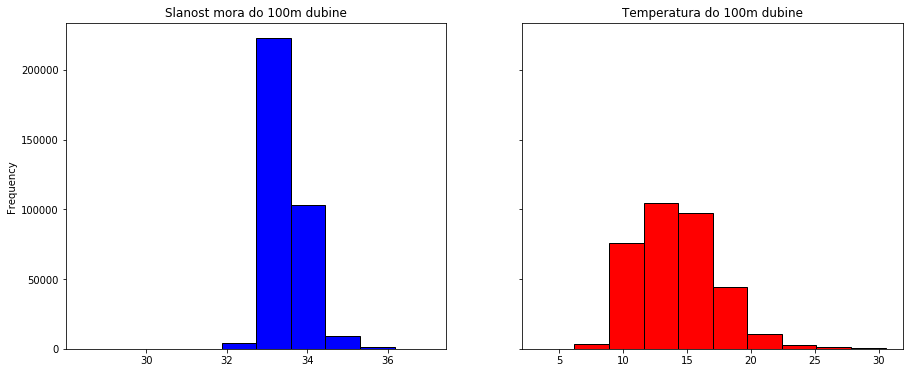

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

slanost.plot(kind='hist', ax=axes[0], title="Slanost mora do 100m dubine", color="blue", edgecolor='black')
temperatura.plot(kind='hist', ax=axes[1], title="Temperatura do 100m dubine", color="red", edgecolor='black')

plt.show()

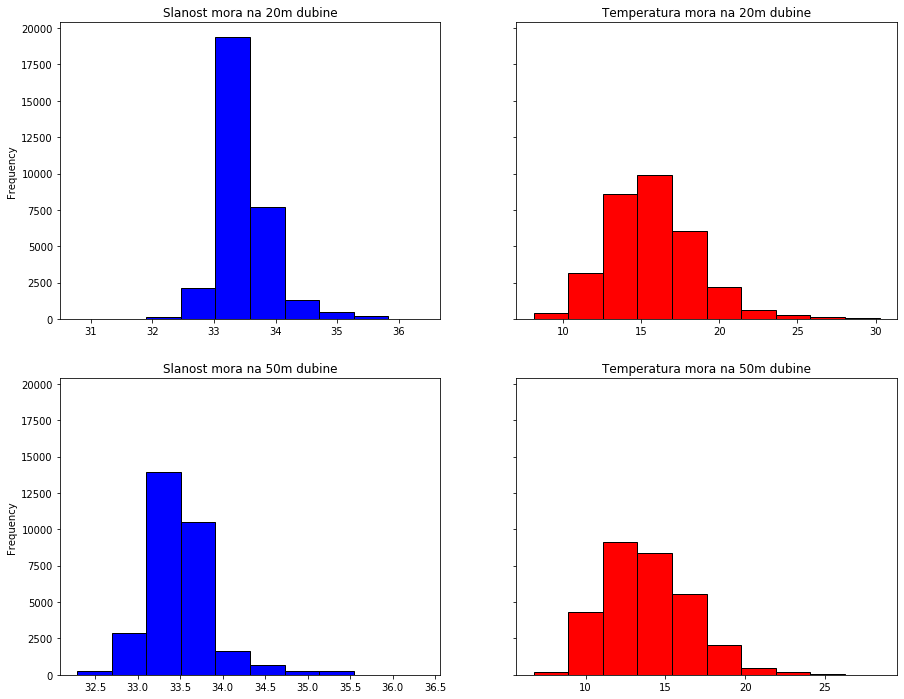

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), sharey=True)

slanostXX.plot(kind='hist', ax=axes[0][0], title="Slanost mora na 20m dubine", color="blue", edgecolor='black')
temperaturaXX.plot(kind='hist', ax=axes[0][1], title="Temperatura mora na 20m dubine", color="red", edgecolor='black')

slanostL.plot(kind='hist', ax=axes[1][0], title="Slanost mora na 50m dubine", color="blue", edgecolor='black')
temperaturaL.plot(kind='hist', ax=axes[1][1], title="Temperatura mora na 50m dubine", color="red", edgecolor='black')
plt.show()

#### Mjere nagnutosti

Općenito kada baratamo nekim podacima poželjno je da su oni bar donekle normalno distribuirani. Vidimo da su naši podaci nisu savršeni, a da li to značajno odudara od normalne distribucije možemo provjeriti.

In [10]:
from scipy.stats import skew

Prvo izračunajmo mjere nagnutosti. Statistika kojom se opisuje ta veličina glasi:

$$ s=\frac{\frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})^3}{(\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2)^{3/2}} $$

U slučaju simetričnih podataka trebali bi dobiti broj blizu nula, ukoliko dobijemo broj veći od nula to ukazuje na nagnutost ulijevo, dok broj manji od nula ukazuje na nagnutost nadesno.

In [11]:
print ("slanost mora (do 100m) =", skew(slanost))
print ("temperatura mora (do 100m) =", skew(temperatura))
print ("slanost mora (na 20m) =", skew(slanostXX))
print ("temperatura mora (na 20m) =", skew(temperaturaXX))
print ("slanost mora (na 50m) =", skew(slanostL))
print ("temperatura mora (na 50m) =", skew(temperaturaL))

slanost mora (do 100m) = 1.3095285214729935
temperatura mora (do 100m) = 0.6201444429353683
slanost mora (na 20m) = 1.4220376226418312
temperatura mora (na 20m) = 0.7648695518574139
slanost mora (na 50m) = 1.4502012974821679
temperatura mora (na 50m) = 0.693825811174741


#### Normalna distribucija podataka

Nadalje, možemo napraviti statistički test čija je nulhipoteza

$$H_0:\text{podaci su normalno distribuirani},$$
a alternativa
$$H_1:\text{podaci nisu normalno distribuirani}.$$

Funkcija nam vraća dvije vrijednosti - vrijednost testne statistike, i tzv. p-vrijednost. Ukoliko je p-vrijednost jako mala (najčešće zahtjevamo da je manja od 0.1, 0.05 ili 0.01, ovisno o željenoj značajnosti) onda odbacujemo nulhipotezu.

In [12]:
stndvs = (slanost-np.mean(slanost))/np.std(slanost)
stndtt = (temperatura-np.mean(temperatura))/np.std(temperatura)
stndvsXX = (slanostXX-np.mean(slanostXX))/np.std(slanostXX)
stndttXX = (temperaturaXX-np.mean(temperaturaXX))/np.std(temperaturaXX)
stndvsL = (slanostL-np.mean(slanostL))/np.std(slanostL)
stndttL = (temperaturaL-np.mean(temperaturaL))/np.std(temperaturaL)

In [13]:
from scipy.stats import kstest
print (kstest(np.array(stndvs), 'norm'))
print (kstest(np.array(stndtt), 'norm'))
print (kstest(np.array(stndvsXX), 'norm'))
print (kstest(np.array(stndttXX), 'norm'))
print (kstest(np.array(stndvsL), 'norm'))
print (kstest(np.array(stndttL), 'norm'))

KstestResult(statistic=0.10421341399715323, pvalue=0.0)
KstestResult(statistic=0.03627522385304398, pvalue=0.0)
KstestResult(statistic=0.14164779762813973, pvalue=0.0)
KstestResult(statistic=0.04319240147214587, pvalue=2.6878115279882505e-51)
KstestResult(statistic=0.11400940999808074, pvalue=0.0)
KstestResult(statistic=0.045981868698113326, pvalue=2.951409893914876e-56)


#### Koeficijent korelacije

S obzirom da promatramo linearnu vezu među podacima, ima smisla pogledati još i __Pearsonov koeficijent korelacije__. Pearsonov koeficijent je mjera upravo __linearne povezanosti__ među podacima, a na uzorku se računa:

$$ r=\frac{\sum_{i=1}^{n}(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum_{i=1}^{n}(x_i-\bar x)^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar y)^2}}.$$

On poprima vrijednosti između $-1$ i $1$, pri čemu $1$ označava potpunu linearnu povezanost u pozitivnom smjeru, a $-1$ potpunu linearnu povezanost u negativnom smjeru. Broj blizu $0$ nam govori da nema linearne povezanosti među podacima.

In [14]:
from scipy.stats import pearsonr
print(pearsonr(slanost, temperatura))
print(pearsonr(slanostXX, temperaturaXX))
print(pearsonr(slanostL, temperaturaL))

(0.27546009226720003, 0.0)
(0.5197156252018882, 0.0)
(0.37841211671635466, 0.0)


Funkcija nam opet vraća dva broja: prvi je izračunati koeficijent (koji je očekivano pozitivan), a drugi p-vrijednost. Ukoliko nas p-vrijednost ne zanima, nego želimo saznati samo koeficijent, možemo nacrtati i korelacijsku matricu, ona naravno (na nedijagonalnim elementima) sadrži traženi koeficijent. Možemo također vidjeti i neke druge mjere korelacije poput _Spearmanovog_ i _Kendallovog_ koeficijenta.

In [15]:
def korelacija(koef='pearson'):
   display(df.corr(method=koef, min_periods=1))

Da bi se widget prikazao treba odraditi naredbu ```conda install -c conda-forge ipywidgets```.

In [16]:
from ipywidgets import interact
interact(korelacija, koef=['pearson', 'spearman', 'kendall']);

interactive(children=(Dropdown(description='koef', options=('pearson', 'spearman', 'kendall'), value='pearson'…

Možemo koristiti heatmap da bi to malo vizualnije prikazali.

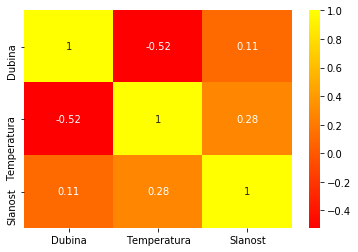

In [17]:
import seaborn as sb
pearson = df.corr(method='pearson')
sb.heatmap(pearson, cmap='autumn', annot=True)

plt.show()

#### Reziduali

Metoda najmanjih kvadrata daje optimalno rješenje pod pretpostavkom da je stvarni model zaista linearan i da je šum u ciljnoj varijabli $y$ normalno raspodijeljen. To možemo provjeriti plotanjem reziduala - odstupanja od predviđene vrijednosti $\hat{y}$ za svaki od ulaznih primjera.

In [18]:
def reziduali(alpha, beta, X, Y):
    Y1 = alpha + beta*X
    return Y1 - Y

Izračunat ćemo normalnu fukciju gustoće evaluiranu u visini sa očekivanjem $\mu $ i devijacijom $\sigma$. Formula je:

$$ f(x | \mu , \sigma) = {\displaystyle {\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$$


In [19]:
import math as m

In [20]:
def normFjaGustoce(X, mi, sigma):
    korijen = m.sqrt(2 * m.pi * sigma**2)
    def power(x):
        return m.pow(m.e, - (x - mi)**2 / (2 * sigma**2))
    powerArray = np.vectorize(power)
    e_na = powerArray(X)
    return e_na / korijen

In [21]:
def graf_rezidual(ax1, reziduals, i, color1):
    n, bins, patches = ax1[i].hist(reziduals, bins=20, density=True, color=color1, edgecolor='black')
    bincenters = 0.5*(bins[1:]+bins[:-1])
    fjaGustoce = normFjaGustoce(bincenters, np.mean(reziduals), np.std(reziduals))
    gaussovaKr = ax1[i].plot(bincenters, fjaGustoce, 'r--', linewidth=1)
    ax1[i].set_xlim(-10, 10)
    ax1[i].set_frame_on(False)

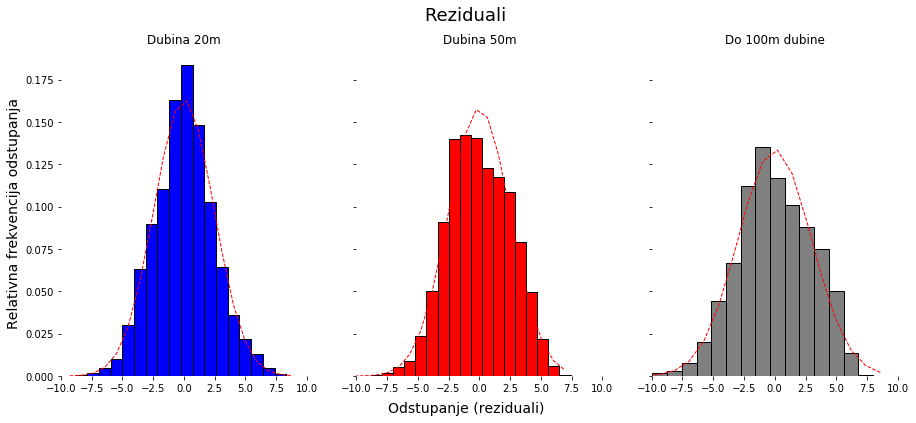

In [22]:
fig1, ax1 = plt.subplots(1, 3, figsize=(15, 6), sharey = True)
fig1.suptitle("Reziduali", fontsize = 18)
fig1.text(0.5, 0.04, 'Odstupanje (reziduali)', ha='center', fontsize = 14)

rezidualiXX = reziduali(alphaXX, betaXX, slanostXX, temperaturaXX)
graf_rezidual(ax1, rezidualiXX, 0, 'blue')
ax1[0].set_ylabel('Relativna frekvencija odstupanja', fontsize = 14)
ax1[0].set(title = 'Dubina 20m')

rezidualiL = reziduali(alphaL, betaL, slanostL, temperaturaL)
graf_rezidual(ax1, rezidualiL, 1, 'red')
ax1[1].set(title = 'Dubina 50m')

rezidualisve = reziduali(alpha, beta, slanost, temperatura)
graf_rezidual(ax1, rezidualisve, 2, 'grey')
ax1[2].set(title = 'Do 100m dubine')

plt.show()

In [23]:
print("a_0 20 =", najmanjiKvadrati(slanostXX, temperaturaXX)[0])
print("a_1 20 =", najmanjiKvadrati(slanostXX, temperaturaXX)[1])
print("a_0 50 =", najmanjiKvadrati(slanostL, temperaturaL)[0])
print("a_1 50 =", najmanjiKvadrati(slanostL, temperaturaL)[1])
print("a_0 =", najmanjiKvadrati(slanost, temperatura)[0])
print("a_1 =", najmanjiKvadrati(slanost, temperatura)[1])

a_0 20 = -103.19322480796858
a_1 20 = 3.549968059429723
a_0 50 = -74.87565953247586
a_1 50 = 2.6501270402281407
a_0 = -59.244086416099684
a_1 = 2.190516222869466


Dobivene jednadžbe ovisnosti temperature $T$ o slanosti $x$ sa našeg skupa podataka:

Na 20m: $ T_{20}(x) = 3.55x - 103.19 $

Na 50m: $ T_{50}(x) = 2.65x - 74.88 $

Do 100m: $ T(x) = 2.19x - 59.24 $

Pogledajmo sada što se događa kada transformiramo vrijednosti funkcije na primjer funkcijom $x^9$.

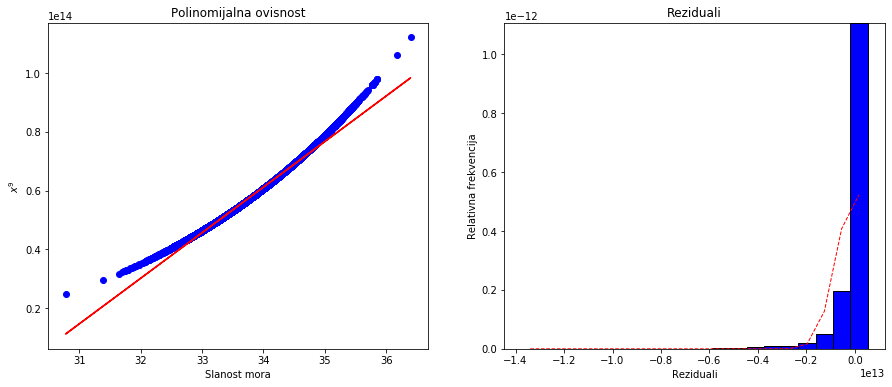

In [24]:
poltemp = temperaturaXX + slanostXX**9

fig1, ax = plt.subplots(1, 2, figsize=(15, 6))

alpha, beta = najmanjiKvadrati(slanostXX, poltemp)

ax[0].scatter(slanostXX, poltemp, c = "blue")
ax[0].plot(slanostXX, beta * slanostXX + alpha, '-', color = 'red')
ax[0].set(xlabel = 'Slanost mora', ylabel = '$x^9$', title = 'Polinomijalna ovisnost')

rezidualiXX = reziduali(alpha, beta, slanostXX, poltemp)
n, bins, patches = ax[1].hist(rezidualiXX, bins=20, density=True, color='blue', edgecolor='black')
ax[1].set(xlabel = 'Reziduali', ylabel = 'Relativna frekvencija', title = 'Reziduali')
bincenters = 0.5*(bins[1:]+bins[:-1])
fjaGustoce = normFjaGustoce(bincenters, np.mean(rezidualiXX), np.std(rezidualiXX))
gaussovaKr = ax[1].plot(bincenters, fjaGustoce, 'r--', linewidth=1, label='Gaussova krivulja')

plt.show()

#### Pie chart - slanost i temperatura mora

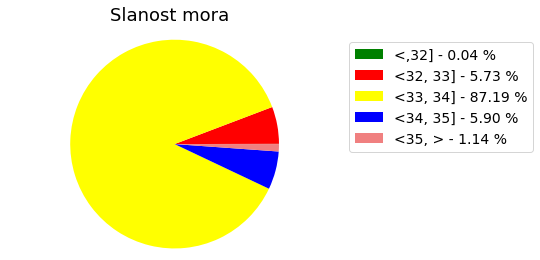

In [25]:
slanost1 = df.loc[df['Slanost'] <= 32]
slanost2 = df.loc[(df['Slanost'] > 32) & (df['Slanost'] <= 33)]
slanost3 = df.loc[(df['Slanost'] > 33) & (df['Slanost'] <= 34)]
slanost4 = df.loc[(df['Slanost'] > 34) & (df['Slanost'] <= 35)]
slanost5 = df.loc[(df['Slanost'] > 35)]

slanosti = [slanost1.size, slanost2.size, slanost3.size, slanost4.size, slanost5.size]
labels = '<,32]', '<32, 33]', '<33, 34]', '<34, 35]', '<35, >'
colors = ['green','red','yellow','blue','lightcoral']
porcent = 100 * (slanosti / np.sum(slanosti))

fig1, ax1 = plt.subplots()
fig1.suptitle("Slanost mora", fontsize = 18)

ax1.axis('equal')

patches, texts = ax1.pie(slanosti, colors=colors, startangle=0, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

plt.legend(patches, labels, bbox_to_anchor=(1, 1), fontsize=14)

plt.show()

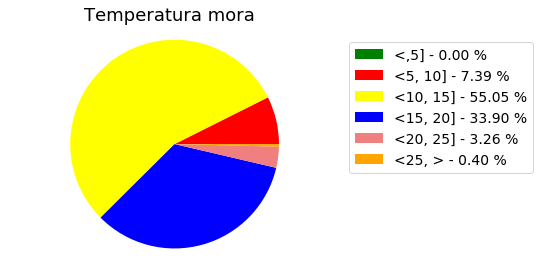

In [26]:
temp1 = df.loc[df['Temperatura'] <= 5]
temp2 = df.loc[(df['Temperatura'] > 5) & (df['Temperatura'] <= 10)]
temp3 = df.loc[(df['Temperatura'] > 10) & (df['Temperatura'] <= 15)]
temp4 = df.loc[(df['Temperatura'] > 15) & (df['Temperatura'] <= 20)]
temp5 = df.loc[(df['Temperatura'] > 20) & (df['Temperatura'] <= 25)]
temp6 = df.loc[(df['Temperatura'] > 25)]

temperature = [temp1.size, temp2.size, temp3.size, temp4.size, temp5.size, temp6.size]
labels = '<,5]', '<5, 10]', '<10, 15]', '<15, 20]', '<20, 25]', '<25, >'
colors = ['green','red','yellow','blue','lightcoral','orange']
porcent = 100 * (temperature / np.sum(temperature))

fig1, ax1 = plt.subplots()
fig1.suptitle("Temperatura mora", fontsize = 18)

ax1.axis('equal')

patches, texts = ax1.pie(temperature, colors=colors, startangle=0, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

plt.legend(patches, labels, bbox_to_anchor=(1, 1), fontsize=14)

plt.show()

## Multivarijantna regresija

Kod multivarijantne regresije imamo linearnu ovisnost jedne zavisne varijable ($y$) o više nezavisnih varijabli ($x_1, x_2, … x_n$)

$$
y = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n
$$

Za više varijabli koristit ćemo **sklearn**-ovu LinearRegression klasu.

### Primjer - Ovisnost dubine, temperature i slanosti mora

In [27]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

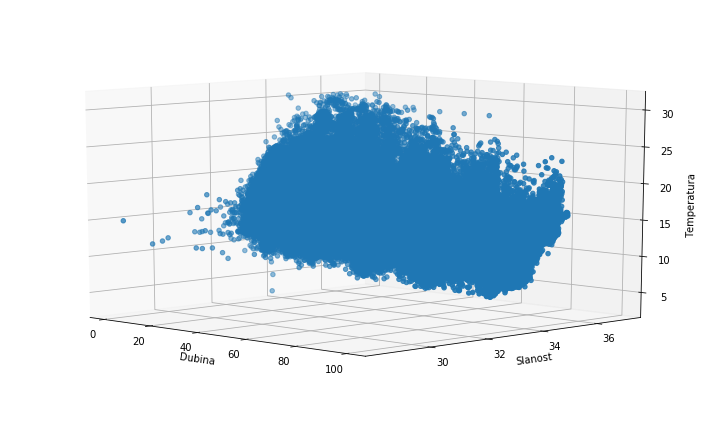

In [28]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(xs=df['Dubina'], ys=df['Slanost'], zs=df['Temperatura'], zorder=1)

ax.set_xlabel('Dubina')
ax.set_ylabel('Slanost')
ax.set_zlabel('Temperatura')

ax.view_init(10, -45)

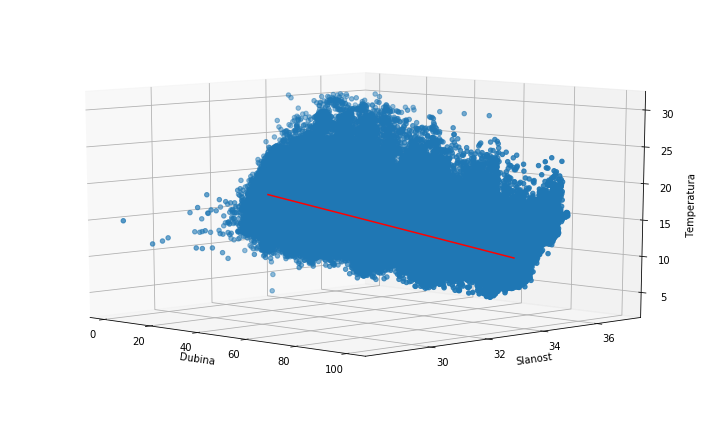

In [29]:
X = df['Dubina'].values.reshape(-1, 1)
Y = df[['Temperatura', 'Slanost']].values
reg = LinearRegression().fit(X, Y)

x_line = np.arange(1, 101).reshape(-1, 1)
p = reg.predict(x_line).T
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(1, 1, 1, projection='3d')
ax.scatter(xs=df['Dubina'], ys=df['Slanost'], zs=df['Temperatura'], zorder=1)

ax.set_xlabel('Dubina')
ax.set_ylabel('Slanost')
ax.set_zlabel('Temperatura')

ax.view_init(10, -45)

ax.plot(xs = x_line, ys = p[1], zs = p[0], color='red', zorder=10)
plt.show()

In [30]:
print("temp coef =", reg.coef_[0][0])
print("slan coef =", reg.coef_[1][0])

temp coef = -0.053248713742739116
slan coef = 0.001415347461481233


Što se dubina povećava _temperatura_ se smanjuje za 0.0532 dok se _slanost_ poveća za 0.0014.

Za kraj bih ostavio jednu animaciju. Treba instalirati ImageMagick u ```C:\Program Files\``` sa https://www.imagemagick.org/script/index.php.

In [31]:
import matplotlib.animation as animation

In [32]:
def line(x, y, z, s, cl, el, al):
  ax = fig.gca(projection='3d')
  lw = 1
  ap = 1
  
  X1 = [x, x+s, x+s, x, x]
  Y1 = [y, y, y, y, y]
  Z1 = [z, z, z+s, z+s, z]
  plt.plot(X1, Y1, Z1, zdir = "z", c= cl, alpha = ap, linewidth  = lw)
  
  X2 = [x, x+s, x+s, x, x]
  Y2 = [y+s, y+s, y+s, y+s, y+s]
  Z2 = [z, z, z+s, z+s, z]
  plt.plot(X2, Y2, Z2, zdir = "z", c= cl, alpha = ap, linewidth  = lw)
  
  X3 = [x, x+s, x+s, x, x]
  Y3 = [y, y, y, y, y]
  Z3 = [z, z, z+s, z+s, z]
  plt.plot(Y3, X3, Z3, zdir = "z", c= cl, alpha = ap, linewidth  = lw) 
  
  X4 = [x, x+s, x+s, x, x]
  Y4 = [y+s, y+s, y+s, y+s, y+s]
  Z4 = [z, z, z+s, z+s, z]
  plt.plot(Y4, X4, Z4, zdir = "z", c= cl, alpha = ap, linewidth  = lw) 
       
  a = 4.0 
  
  ax.set_xlim3d(-a, a)
  ax.set_ylim3d(-a, a)
  ax.set_zlim3d(-a, a)
  
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  ax.set_zticklabels([])
  ax.set_yticks([])
  ax.set_xticks([])
  ax.set_zticks([])
  
  ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
  ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
  ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

  ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
  ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
  ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
  
  ax.elev = el  
  ax.azim = az  
  ax.dist = 8.4 
  
  return

In [33]:
fr  = 72 
ctd = 0  
az  = 40 
el  = 20 
ctc = 0  

In [34]:
def F(t, m): 
    return np.exp(-t)*np.cos(2*np.pi*t)*m

In [35]:
def FI(t, m):
    return np.exp(-t)*np.sin(2*np.pi*t)*m

In [36]:
def update(*args):
  global ctd, az, el, ctc
  plt.clf()
  i  = 22 
  zc = np.arange(0.75, 30, 0.099)[i:] 
  sz  = np.linspace(16, -1, 16)*4
  sz1 = np.linspace(16, -1, 16)*1
  d = 0
  for w in range(3, 16): 
      n = w/5 
      if w%5 == 0 : 
         line(-n+FI(zc[ctc], sz1[d]), -n+FI(zc[ctc], sz1[d]), -n+F(zc[ctc], sz[d]), n*2, "magenta", el, az)
      if w%4 == 0 :
         line(-n+FI(zc[ctc], sz1[d]), -n+FI(zc[ctc], sz1[d]), -n+F(zc[ctc], sz[d]), n*2, "gold", el, az)
      d += 1 
  if ctd < 36:
     ctc += 1
  else: 
     ctc -= 1 
    
  az += 360/fr
  ctd += 1
  return ()

In [37]:
def init():
    return()

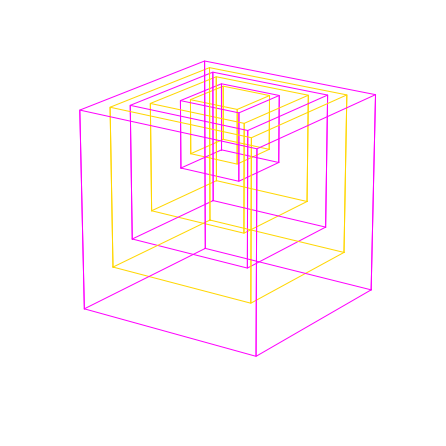

In [38]:
fig, g = plt.subplots(figsize=(6, 6))
plt.subplots_adjust(left = 0.00, right = 1, top = 1.0, bottom = 0.0)
z = "white"
plt.rcParams['axes.facecolor'] = z
plt.rcParams['savefig.facecolor'] = z

anim = animation.FuncAnimation(fig, update, init_func=init, blit = True, frames=fr, repeat = False) 

sf = "Kocka.gif"      
Sname = "C:\\Users\\Martin\\Documents\\GitHub\\MS\\prviesej\\" + sf # stavite Vaš direktorij  
anim.save(Sname, writer="imagemagick", fps=27) 

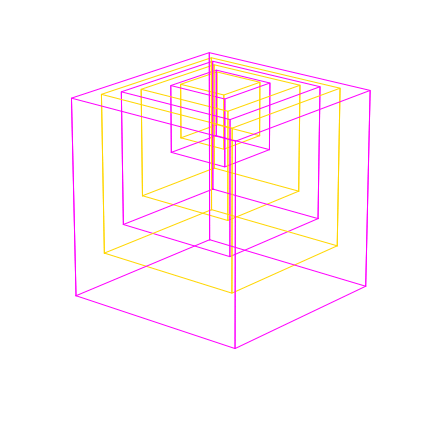

In [39]:
# gif koji ste Vi kreirali
from IPython.display import Image
with open('Kocka.gif', 'rb') as f:
    display(Image(data=f.read(), format='png'))

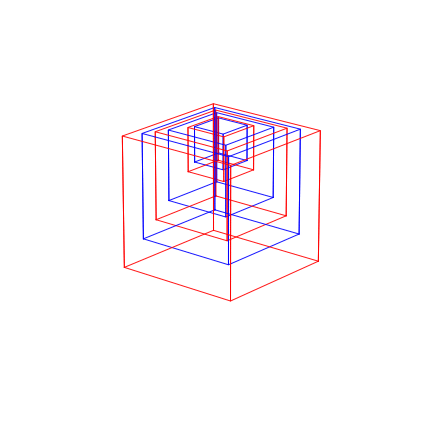

In [40]:
# gif koji sam ja kreirao (u slučaju da ne želite (ili niste uspjeli) napraviti gif)
with open('Kocka_old.gif', 'rb') as f:
    display(Image(data=f.read(), format='png'))